<a href="https://colab.research.google.com/github/VamsiKrishna-05/PROJECT---1/blob/main/Vamsi_OBJ%2BCNN%2BLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pip
!pip install -q tensorflow opencv-python-headless ultralytics scikit-learn tqdm matplotlib

from google.colab import drive
import zipfile, os

drive.mount('/content/drive')
zip_path = '/content/drive/My Drive/INCAR_SAMPLED_FINAL.zip'
extract_path = '/content/INCAR_SAMPLED_FINAL'

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('/content/')
else:
    print(f"✅ Dataset already extracted at: {extract_path}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Mounted at /content/drive


In [2]:
import os

DATASET_ROOT = "/content/INCAR_SAMPLED_FINAL"
TEST_VIDEO_PATH = "/content/Project.mp4"
MODEL_SAVE_PATH = "/content/incabin_model.h5"
OUTPUT_VIDEO_PATH = "/content/output_comparison.mp4"
TFLITE_MODEL_PATH = "/content/incabin_model.tflite"

class Config:
    IMG_HEIGHT = 128
    IMG_WIDTH = 128
    SEQUENCE_LENGTH = 16
    NUM_CLASSES = 20
    LSTM_UNITS = 128
    DROPOUT_RATE = 0.5
    BATCH_SIZE = 8
    EPOCHS = 40
    LEARNING_RATE = 0.0001
    VALIDATION_SPLIT = 0.2
    CLASS_NAMES = [f"C{i}" for i in range(1, 21)]
    AGGRESSIVE_CLASSES = list(range(0, 12))
    NON_AGGRESSIVE_CLASSES = list(range(12, 20))
    DANGEROUS_OBJECTS = ['knife', 'gun', 'scissors', 'pistol']
    YOLO_CONF_THRESHOLD = 0.5
    PERSON_CLASS_ID = 0

config = Config()


In [3]:
# Cell 2: Dataset Tree Structure Analyzer
import os
from pathlib import Path
from collections import defaultdict

def analyze_dataset_structure(dataset_root):
    """
    Analyze and display the complete tree structure of INCAR dataset
    with file counts for each folder
    """

    if not os.path.exists(dataset_root):
        print(f"❌ Dataset root not found: {dataset_root}")
        return

    print("🌳 INCAR Dataset Tree Structure")
    print("=" * 60)

    root_path = Path(dataset_root)
    total_files = 0
    total_folders = 0
    class_summary = defaultdict(lambda: {'sessions': 0, 'files': 0})

    # Walk through the directory structure
    for category_folder in sorted(root_path.iterdir()):
        if not category_folder.is_dir():
            continue

        category_name = category_folder.name
        print(f"\n📁 {category_name}/")
        category_files = 0
        category_folders = 0

        for class_folder in sorted(category_folder.iterdir()):
            if not class_folder.is_dir():
                continue

            class_name = class_folder.name
            class_files = 0
            class_sessions = 0

            print(f"  ├── 📂 {class_name}/")

            for session_folder in sorted(class_folder.iterdir()):
                if not session_folder.is_dir():
                    continue

                session_name = session_folder.name
                session_files = 0
                print(f"  │   ├── 📁 {session_name}/")

                # Check for rgb_sampled or rgb folders
                for sub_folder_name in ['rgb_sampled', 'rgb', 'depth', 'ir']:
                    sub_folder = session_folder / sub_folder_name
                    if sub_folder.exists() and sub_folder.is_dir():
                        # Count files in this subfolder
                        files = list(sub_folder.glob('*.*'))
                        file_count = len(files)

                        if file_count > 0:
                            print(f"  │   │   ├── 📄 {sub_folder_name}/ ({file_count} files)")
                            session_files += file_count

                class_files += session_files
                if session_files > 0:
                    class_sessions += 1
                    print(f"  │   │   └── Total: {session_files} files")

            category_files += class_files
            category_folders += class_sessions

            # Update class summary
            class_summary[class_name]['sessions'] = class_sessions
            class_summary[class_name]['files'] = class_files

            print(f"  │   └── 📊 {class_name} Summary: {class_sessions} sessions, {class_files} files")

        total_files += category_files
        total_folders += category_folders
        print(f"  └── 📊 {category_name} Summary: {category_folders} sessions, {category_files} files")

    # Print detailed summary
    print("\n" + "=" * 60)
    print("📊 DATASET SUMMARY")
    print("=" * 60)

    print(f"🗂️  Total Categories: {len(list(root_path.iterdir()))}")
    print(f"📁 Total Sessions: {total_folders}")
    print(f"📄 Total Files: {total_files}")
    print(f"💾 Average Files per Session: {total_files/total_folders if total_folders > 0 else 0:.1f}")

    # Class-wise breakdown
    print(f"\n📋 CLASS-WISE BREAKDOWN:")
    print(f"{'Class':<8} {'Sessions':<10} {'Files':<8} {'Avg Files/Session':<15}")
    print("-" * 45)

    for class_name in sorted(class_summary.keys()):
        sessions = class_summary[class_name]['sessions']
        files = class_summary[class_name]['files']
        avg_files = files / sessions if sessions > 0 else 0
        print(f"{class_name:<8} {sessions:<10} {files:<8} {avg_files:<15.1f}")

    return {
        'total_files': total_files,
        'total_sessions': total_folders,
        'class_summary': dict(class_summary)
    }

# Run the analysis
dataset_stats = analyze_dataset_structure(extract_path)


🌳 INCAR Dataset Tree Structure

📁 NON_VIOLENCE_WITHOUT_OBJECT/
  ├── 📂 C13/
  │   ├── 📁 C13_P10_P11_1/
  │   │   ├── 📄 rgb_sampled/ (30 files)
  │   │   ├── 📄 rgb/ (100 files)
  │   │   └── Total: 130 files
  │   ├── 📁 C13_P10_P11_2/
  │   │   ├── 📄 rgb_sampled/ (30 files)
  │   │   ├── 📄 rgb/ (100 files)
  │   │   └── Total: 130 files
  │   ├── 📁 C13_P10_P9_1/
  │   │   ├── 📄 rgb_sampled/ (30 files)
  │   │   ├── 📄 rgb/ (100 files)
  │   │   └── Total: 130 files
  │   ├── 📁 C13_P10_P9_2/
  │   │   ├── 📄 rgb_sampled/ (30 files)
  │   │   ├── 📄 rgb/ (100 files)
  │   │   └── Total: 130 files
  │   ├── 📁 C13_P11_P10_1/
  │   │   ├── 📄 rgb_sampled/ (30 files)
  │   │   ├── 📄 rgb/ (100 files)
  │   │   └── Total: 130 files
  │   ├── 📁 C13_P11_P10_2/
  │   │   ├── 📄 rgb_sampled/ (30 files)
  │   │   ├── 📄 rgb/ (100 files)
  │   │   └── Total: 130 files
  │   ├── 📁 C13_P11_P12_1/
  │   │   ├── 📄 rgb_sampled/ (30 files)
  │   │   ├── 📄 rgb/ (100 files)
  │   │   └── Total: 130 files
  │   ├──

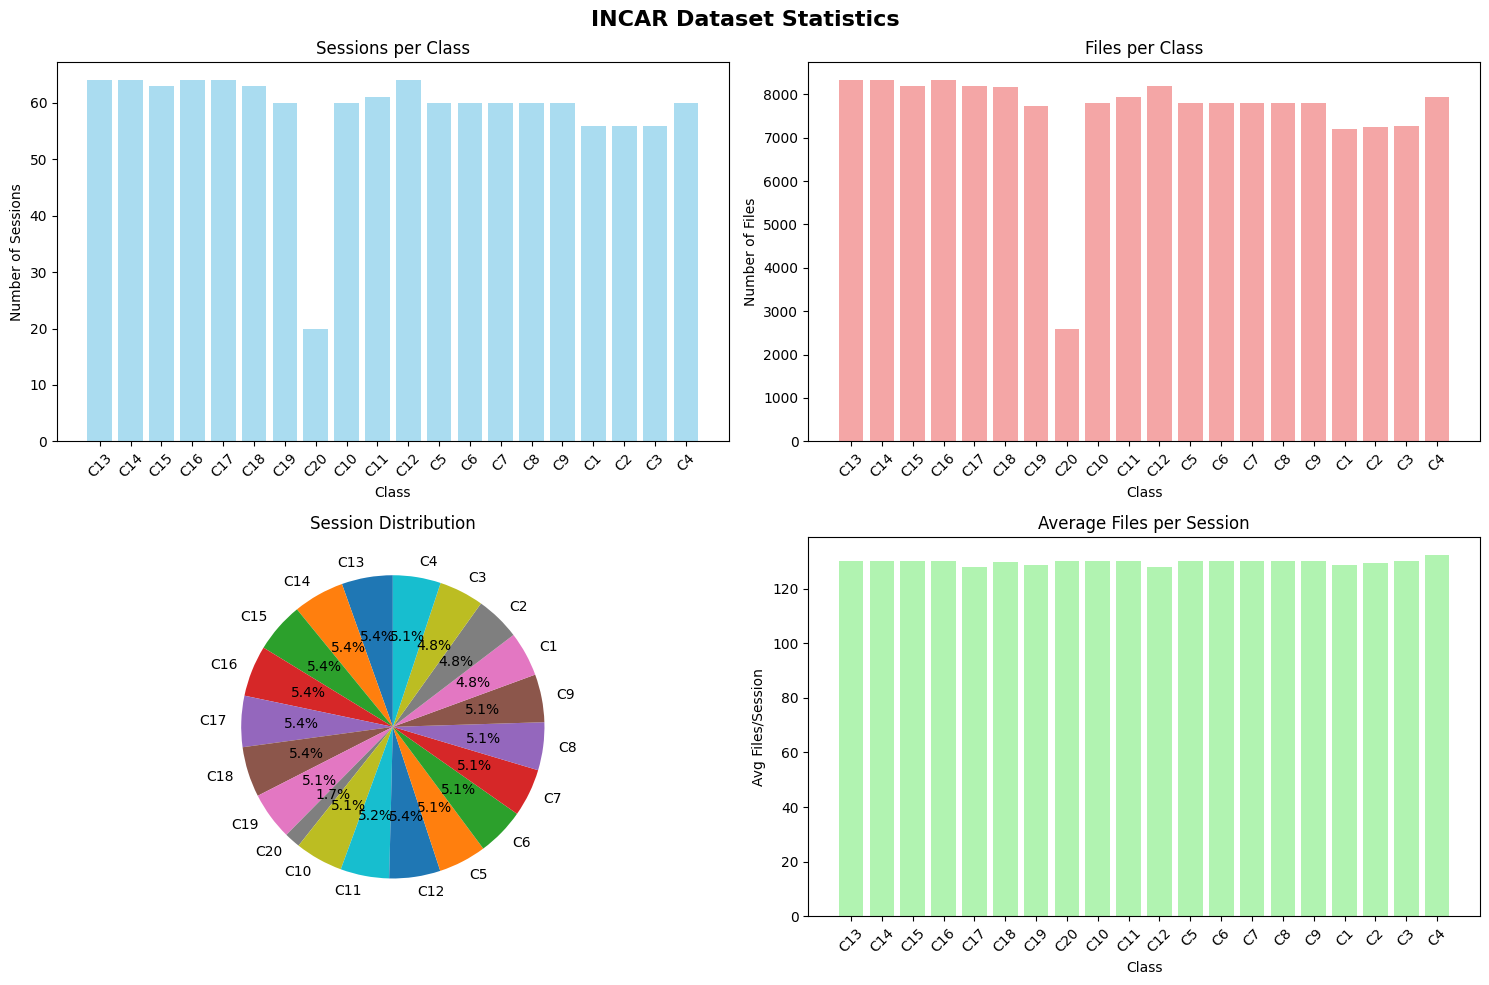


📈 STATISTICAL INSIGHTS:
   Most sessions: C13 (64 sessions)
   Least sessions: C20 (20 sessions)
   Most files: C13 (8320 files)
   Least files: C20 (2600 files)
   Dataset balance ratio: 3.20:1


In [4]:
# Cell 3: Visual Statistics and Data Distribution
import matplotlib.pyplot as plt
import numpy as np

def plot_dataset_statistics(dataset_stats):
    """
    Create visualizations for dataset distribution
    """

    if not dataset_stats:
        print("❌ No dataset statistics to plot")
        return

    class_summary = dataset_stats['class_summary']

    if not class_summary:
        print("❌ No class data found")
        return

    # Extract data for plotting
    classes = list(class_summary.keys())
    sessions = [class_summary[cls]['sessions'] for cls in classes]
    files = [class_summary[cls]['files'] for cls in classes]

    # Create subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('INCAR Dataset Statistics', fontsize=16, fontweight='bold')

    # 1. Sessions per class (bar chart)
    ax1.bar(classes, sessions, color='skyblue', alpha=0.7)
    ax1.set_title('Sessions per Class')
    ax1.set_xlabel('Class')
    ax1.set_ylabel('Number of Sessions')
    ax1.tick_params(axis='x', rotation=45)

    # 2. Files per class (bar chart)
    ax2.bar(classes, files, color='lightcoral', alpha=0.7)
    ax2.set_title('Files per Class')
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Number of Files')
    ax2.tick_params(axis='x', rotation=45)

    # 3. Distribution pie chart (sessions)
    ax3.pie(sessions, labels=classes, autopct='%1.1f%%', startangle=90)
    ax3.set_title('Session Distribution')

    # 4. Average files per session by class
    avg_files_per_session = [files[i]/sessions[i] if sessions[i] > 0 else 0 for i in range(len(classes))]
    ax4.bar(classes, avg_files_per_session, color='lightgreen', alpha=0.7)
    ax4.set_title('Average Files per Session')
    ax4.set_xlabel('Class')
    ax4.set_ylabel('Avg Files/Session')
    ax4.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Print numerical summary
    print("\n📈 STATISTICAL INSIGHTS:")
    print(f"   Most sessions: {max(classes, key=lambda x: class_summary[x]['sessions'])} ({max(sessions)} sessions)")
    print(f"   Least sessions: {min(classes, key=lambda x: class_summary[x]['sessions'])} ({min(sessions)} sessions)")
    print(f"   Most files: {max(classes, key=lambda x: class_summary[x]['files'])} ({max(files)} files)")
    print(f"   Least files: {min(classes, key=lambda x: class_summary[x]['files'])} ({min(files)} files)")
    print(f"   Dataset balance ratio: {max(files)/min(files) if min(files) > 0 else 'N/A':.2f}:1")

# Generate plots
plot_dataset_statistics(dataset_stats)


In [5]:
# Cell 4: Detailed File Type Analysis
def analyze_file_types(dataset_root):
    """
    Analyze file types and extensions in the dataset
    """

    print("\n🔍 FILE TYPE ANALYSIS")
    print("=" * 40)

    file_extensions = {}
    folder_types = {}

    root_path = Path(dataset_root)

    for category_folder in root_path.iterdir():
        if not category_folder.is_dir():
            continue

        for class_folder in category_folder.iterdir():
            if not class_folder.is_dir():
                continue

            for session_folder in class_folder.iterdir():
                if not session_folder.is_dir():
                    continue

                for sub_folder in session_folder.iterdir():
                    if sub_folder.is_dir():
                        folder_name = sub_folder.name
                        folder_types[folder_name] = folder_types.get(folder_name, 0) + 1

                        # Analyze files in this subfolder
                        for file_path in sub_folder.iterdir():
                            if file_path.is_file():
                                ext = file_path.suffix.lower()
                                if ext:
                                    file_extensions[ext] = file_extensions.get(ext, 0) + 1

    print("📁 FOLDER TYPES:")
    for folder_type, count in sorted(folder_types.items()):
        print(f"   {folder_type}: {count} occurrences")

    print(f"\n📄 FILE EXTENSIONS:")
    for ext, count in sorted(file_extensions.items()):
        print(f"   {ext}: {count} files")

    return file_extensions, folder_types

# Analyze file types
extensions, folders = analyze_file_types(extract_path)



🔍 FILE TYPE ANALYSIS
📁 FOLDER TYPES:
   rgb: 1175 occurrences
   rgb_sampled: 1175 occurrences
   rgb_sampled_sampled: 1 occurrences

📄 FILE EXTENSIONS:
   .jpg: 152436 files


In [6]:
from pathlib import Path
import numpy as np
import cv2

def scan_all_sessions(dataset_root):
    class_data = []
    root_path = Path(dataset_root)
    if not root_path.exists():
        print(f"❌ Dataset root does not exist: {dataset_root}")
        return class_data
    for category_folder in root_path.iterdir():
        if not category_folder.is_dir():
            continue
        for class_folder in category_folder.iterdir():
            if not class_folder.is_dir() or not class_folder.name.startswith('C'):
                continue
            class_name = class_folder.name
            try:
                class_id = int(class_name[1:]) - 1
                if class_id < 0 or class_id >= 20:
                    continue
            except ValueError:
                continue
            for session_folder in class_folder.iterdir():
                if not session_folder.is_dir():
                    continue
                for sub_folder_name in ['rgb_sampled', 'rgb']:
                    rgb_folder = session_folder / sub_folder_name
                    if rgb_folder.exists():
                        jpg_files = list(rgb_folder.glob('*.jpg'))
                        if jpg_files:
                            class_data.append({
                                'category': category_folder.name,
                                'class_name': class_name,
                                'session': session_folder.name,
                                'rgb_folder': str(rgb_folder),
                                'num_frames': len(jpg_files),
                                'class_id': class_id
                            })
    return class_data

def load_sequence_from_folder(folder_path, seq_length, img_height, img_width):
    image_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.jpg')])
    if len(image_files) < seq_length:
        return None
    # Sample evenly
    idxs = np.linspace(0, len(image_files) - 1, seq_length).astype(int)
    frames = []
    for idx in idxs:
        img = cv2.imread(os.path.join(folder_path, image_files[idx]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (img_width, img_height))
        img = img.astype(np.float32) / 255.0
        frames.append(img)
    return np.array(frames)


In [7]:
class_data = scan_all_sessions(DATASET_ROOT)

In [8]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Ensure you run: class_data = scan_all_sessions(DATASET_ROOT)
all_indices = list(range(len(class_data)))
train_idx, val_idx = train_test_split(
    all_indices,
    test_size=config.VALIDATION_SPLIT,
    random_state=42,
    stratify=[class_data[i]['class_id'] for i in all_indices]
)
train_class_data = [class_data[i] for i in train_idx]
val_class_data = [class_data[i] for i in val_idx]

def sequence_generator(class_data, seq_length, img_height, img_width, num_classes):
    for item in class_data:
        seq = load_sequence_from_folder(item['rgb_folder'], seq_length, img_height, img_width)
        if seq is not None:
            label = tf.keras.utils.to_categorical(item['class_id'], num_classes)
            yield seq, label

def make_tf_dataset(class_data, seq_length, img_height, img_width, num_classes, batch_size=4, buffer_size=512, shuffle=True):
    output_signature = (
        tf.TensorSpec(shape=(seq_length, img_height, img_width, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(num_classes,), dtype=tf.float32)
    )
    ds = tf.data.Dataset.from_generator(
        lambda: sequence_generator(class_data, seq_length, img_height, img_width, num_classes),
        output_signature=output_signature
    )

    if shuffle:
        ds = ds.shuffle(buffer_size=buffer_size)

    # ✅ Fix: Repeat dataset to ensure it runs across multiple epochs
    ds = ds.repeat()

    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.AUTOTUNE)

    return ds


train_ds = make_tf_dataset(train_class_data, config.SEQUENCE_LENGTH, config.IMG_HEIGHT, config.IMG_WIDTH, config.NUM_CLASSES, batch_size=config.BATCH_SIZE, shuffle=True)
val_ds = make_tf_dataset(val_class_data, config.SEQUENCE_LENGTH, config.IMG_HEIGHT, config.IMG_WIDTH, config.NUM_CLASSES, batch_size=config.BATCH_SIZE, shuffle=False)

# Use train_ds and val_ds in your model.fit:
# model.fit(train_ds, validation_data=val_ds, ...)


In [10]:
# Enhanced Model Building and Training with Advanced Callbacks

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, TimeDistributed, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import (
    ModelCheckpoint,
    EarlyStopping,
    ReduceLROnPlateau,
    TensorBoard,
    CSVLogger,
    Callback
)
import tensorflow as tf
import datetime


# ═══════════════════════════════════════════════════════════════
# Custom Callback for Better Monitoring
# ═══════════════════════════════════════════════════════════════
class TrainingMonitor(Callback):
    """Custom callback to monitor training progress with detailed logging"""

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        print(f"\n📊 Epoch {epoch + 1} Summary:")
        print(f"   Train Loss: {logs.get('loss', 0):.4f} | Train Acc: {logs.get('accuracy', 0):.4f}")
        print(f"   Val Loss: {logs.get('val_loss', 0):.4f} | Val Acc: {logs.get('val_accuracy', 0):.4f}")
        print(f"   Learning Rate: {float(tf.keras.backend.get_value(self.model.optimizer.learning_rate)):.2e}")


# ═══════════════════════════════════════════════════════════════
# Model Building
# ═══════════════════════════════════════════════════════════════
def build_mobilenet_lstm_model(sequence_length, img_height, img_width, num_classes, lstm_units, dropout_rate):
    """
    Build MobileNetV2 + LSTM model for video action recognition
    """
    input_layer = Input(shape=(sequence_length, img_height, img_width, 3), name='video_input')

    # MobileNetV2 feature extractor (frozen)
    mobilenet_base = MobileNetV2(
        input_shape=(img_height, img_width, 3),
        include_top=False,
        weights='imagenet',
        pooling='avg'
    )
    mobilenet_base.trainable = False

    # Spatial feature extraction
    x = TimeDistributed(mobilenet_base, name='spatial_features')(input_layer)

    # Temporal modeling with LSTM
    x = LSTM(lstm_units, return_sequences=True, name='lstm_1')(x)
    x = Dropout(dropout_rate, name='dropout_1')(x)
    x = LSTM(lstm_units // 2, return_sequences=False, name='lstm_2')(x)
    x = Dropout(dropout_rate, name='dropout_2')(x)

    # Classification head
    x = Dense(64, activation='relu', name='dense_1')(x)
    x = Dropout(0.3, name='dropout_3')(x)
    output = Dense(num_classes, activation='softmax', name='output')(x)

    return Model(inputs=input_layer, outputs=output, name='MobileNetV2_LSTM')


# Build model
model = build_mobilenet_lstm_model(
    config.SEQUENCE_LENGTH,
    config.IMG_HEIGHT,
    config.IMG_WIDTH,
    config.NUM_CLASSES,
    config.LSTM_UNITS,
    config.DROPOUT_RATE
)

print("✅ Model architecture built successfully")
model.summary()


# ═══════════════════════════════════════════════════════════════
# Model Compilation
# ═══════════════════════════════════════════════════════════════
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=config.LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top3_accuracy')
    ]
)

print("✅ Model compiled successfully")


# ═══════════════════════════════════════════════════════════════
# Enhanced Callbacks Configuration
# ═══════════════════════════════════════════════════════════════

# 1. ModelCheckpoint - Save best model
checkpoint_callback = ModelCheckpoint(
    filepath=MODEL_SAVE_PATH,
    monitor='val_accuracy',        # Monitor validation accuracy
    save_best_only=True,           # Only save when val_accuracy improves
    mode='max',                    # Maximize val_accuracy
    verbose=1,
    save_weights_only=False        # Save entire model
)

# 2. EarlyStopping - Stop training when validation loss stops improving
early_stopping_callback = EarlyStopping(
    monitor='val_loss',            # Monitor validation loss
    patience=7,                    # Wait 7 epochs before stopping (increased from 5)
    restore_best_weights=True,     # Restore weights from best epoch
    verbose=1,
    mode='min',                    # Minimize val_loss
    min_delta=0.0001               # Minimum change to qualify as improvement
)

# 3. ReduceLROnPlateau - Reduce learning rate when plateau detected
reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',            # Monitor validation loss
    factor=0.5,                    # Reduce LR by half
    patience=3,                    # Wait 3 epochs before reducing
    min_lr=1e-7,                   # Minimum learning rate
    verbose=1,
    mode='min',
    cooldown=1                     # Wait 1 epoch after LR reduction
)

# 4. TensorBoard - Visualize training in TensorBoard
log_dir = f"/content/logs/fit/{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
tensorboard_callback = TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,              # Log weight histograms every epoch
    write_graph=True,
    update_freq='epoch'
)

# 5. CSVLogger - Log training metrics to CSV file
csv_logger_callback = CSVLogger(
    '/content/training_log.csv',
    separator=',',
    append=False
)

# 6. Custom training monitor
training_monitor = TrainingMonitor()

# Combine all callbacks
callbacks = [
    checkpoint_callback,
    early_stopping_callback,
    reduce_lr_callback,
    tensorboard_callback,
    csv_logger_callback,
    training_monitor
]

print("✅ Callbacks configured:")
print("   • ModelCheckpoint: Save best model based on val_accuracy")
print("   • EarlyStopping: Patience=7, monitor=val_loss")
print("   • ReduceLROnPlateau: Factor=0.5, patience=3")
print("   • TensorBoard: Logs saved to", log_dir)
print("   • CSVLogger: Training log saved to /content/training_log.csv")
print("   • TrainingMonitor: Custom epoch summary")


# ═══════════════════════════════════════════════════════════════
# Model Training
# ═══════════════════════════════════════════════════════════════
print("\n" + "=" * 60)
print("🚀 STARTING TRAINING")
print("=" * 60)

steps_per_epoch = len(train_class_data) // config.BATCH_SIZE
validation_steps = len(val_class_data) // config.BATCH_SIZE

history = model.fit(
    train_ds,
    validation_data=val_ds,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=config.EPOCHS,
    callbacks=callbacks,
    verbose=1
)


print("\n" + "=" * 60)
print("✅ TRAINING COMPLETED")
print("=" * 60)
print(f"📁 Best model saved at: {MODEL_SAVE_PATH}")
print(f"📊 Training logs saved at: /content/training_log.csv")
print(f"📈 TensorBoard logs: {log_dir}")


✅ Model architecture built successfully


Model: "MobileNetV2_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ video_input (InputLayer)        │ (None, 16, 128, 128,   │             0 │
│                                 │ 3)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_features                │ (None, 16, 1280)       │     2,257,984 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16, 128)        │       721,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 20)             │         1,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,034,260 (11.57 MB)

 Trainable params: 776,276 (2.96 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

✅ Model compiled successfully
✅ Callbacks configured:
   • ModelCheckpoint: Save best model based on val_accuracy
   • EarlyStopping: Patience=7, monitor=val_loss
   • ReduceLROnPlateau: Factor=0.5, patience=3
   • TensorBoard: Logs saved to /content/logs/fit/20251025-130312
   • CSVLogger: Training log saved to /content/training_log.csv
   • TrainingMonitor: Custom epoch summary

🚀 STARTING TRAINING
Epoch 1/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.0628 - loss: 3.0303 - top3_accuracy: 0.1596
Epoch 1: val_accuracy improved from -inf to 0.08836, saving model to /content/incabin_model.h5



📊 Epoch 1 Summary:
   Train Loss: 3.0163 | Train Acc: 0.0628
   Val Loss: 2.9687 | Val Acc: 0.0884
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 236s 657ms/step - accuracy: 0.0628 - loss: 3.0302 - top3_accuracy: 0.1596 - val_accuracy: 0.0884 - val_loss: 2.9687 - val_top3_accuracy: 0.2328 - learning_rate: 1.0000e-04
Epoch 2/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.0624 - loss: 2.9804 - top3_accuracy: 0.1923
Epoch 2: val_accuracy improved from 0.08836 to 0.11207, saving model to /content/incabin_model.h5



📊 Epoch 2 Summary:
   Train Loss: 2.9781 | Train Acc: 0.0649
   Val Loss: 2.9384 | Val Acc: 0.1121
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 609ms/step - accuracy: 0.0624 - loss: 2.9804 - top3_accuracy: 0.1924 - val_accuracy: 0.1121 - val_loss: 2.9384 - val_top3_accuracy: 0.2759 - learning_rate: 1.0000e-04
Epoch 3/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - accuracy: 0.0784 - loss: 2.9246 - top3_accuracy: 0.2339
Epoch 3: val_accuracy improved from 0.11207 to 0.13147, saving model to /content/incabin_model.h5



📊 Epoch 3 Summary:
   Train Loss: 2.9156 | Train Acc: 0.0920
   Val Loss: 2.8474 | Val Acc: 0.1315
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 595ms/step - accuracy: 0.0784 - loss: 2.9246 - top3_accuracy: 0.2339 - val_accuracy: 0.1315 - val_loss: 2.8474 - val_top3_accuracy: 0.3319 - learning_rate: 1.0000e-04
Epoch 4/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.1119 - loss: 2.8473 - top3_accuracy: 0.2930
Epoch 4: val_accuracy improved from 0.13147 to 0.16810, saving model to /content/incabin_model.h5



📊 Epoch 4 Summary:
   Train Loss: 2.8112 | Train Acc: 0.1202
   Val Loss: 2.7114 | Val Acc: 0.1681
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 137s 586ms/step - accuracy: 0.1119 - loss: 2.8471 - top3_accuracy: 0.2931 - val_accuracy: 0.1681 - val_loss: 2.7114 - val_top3_accuracy: 0.4073 - learning_rate: 1.0000e-04
Epoch 5/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.1331 - loss: 2.7209 - top3_accuracy: 0.3737
Epoch 5: val_accuracy improved from 0.16810 to 0.17026, saving model to /content/incabin_model.h5



📊 Epoch 5 Summary:
   Train Loss: 2.6943 | Train Acc: 0.1367
   Val Loss: 2.6002 | Val Acc: 0.1703
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 588ms/step - accuracy: 0.1332 - loss: 2.7208 - top3_accuracy: 0.3737 - val_accuracy: 0.1703 - val_loss: 2.6002 - val_top3_accuracy: 0.4375 - learning_rate: 1.0000e-04
Epoch 6/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.1492 - loss: 2.6186 - top3_accuracy: 0.3876
Epoch 6: val_accuracy improved from 0.17026 to 0.17672, saving model to /content/incabin_model.h5



📊 Epoch 6 Summary:
   Train Loss: 2.5783 | Train Acc: 0.1660
   Val Loss: 2.4698 | Val Acc: 0.1767
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 608ms/step - accuracy: 0.1492 - loss: 2.6184 - top3_accuracy: 0.3877 - val_accuracy: 0.1767 - val_loss: 2.4698 - val_top3_accuracy: 0.4828 - learning_rate: 1.0000e-04
Epoch 7/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.1559 - loss: 2.5228 - top3_accuracy: 0.4288
Epoch 7: val_accuracy improved from 0.17672 to 0.28017, saving model to /content/incabin_model.h5



📊 Epoch 7 Summary:
   Train Loss: 2.4666 | Train Acc: 0.1798
   Val Loss: 2.2713 | Val Acc: 0.2802
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 603ms/step - accuracy: 0.1560 - loss: 2.5226 - top3_accuracy: 0.4289 - val_accuracy: 0.2802 - val_loss: 2.2713 - val_top3_accuracy: 0.5991 - learning_rate: 1.0000e-04
Epoch 8/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - accuracy: 0.2019 - loss: 2.4076 - top3_accuracy: 0.4933
Epoch 8: val_accuracy improved from 0.28017 to 0.31250, saving model to /content/incabin_model.h5



📊 Epoch 8 Summary:
   Train Loss: 2.3573 | Train Acc: 0.2112
   Val Loss: 2.1224 | Val Acc: 0.3125
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 611ms/step - accuracy: 0.2019 - loss: 2.4074 - top3_accuracy: 0.4934 - val_accuracy: 0.3125 - val_loss: 2.1224 - val_top3_accuracy: 0.6250 - learning_rate: 1.0000e-04
Epoch 9/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.2489 - loss: 2.2497 - top3_accuracy: 0.5528
Epoch 9: val_accuracy improved from 0.31250 to 0.37931, saving model to /content/incabin_model.h5



📊 Epoch 9 Summary:
   Train Loss: 2.2106 | Train Acc: 0.2596
   Val Loss: 1.9886 | Val Acc: 0.3793
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 611ms/step - accuracy: 0.2490 - loss: 2.2495 - top3_accuracy: 0.5528 - val_accuracy: 0.3793 - val_loss: 1.9886 - val_top3_accuracy: 0.6961 - learning_rate: 1.0000e-04
Epoch 10/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.2982 - loss: 2.1067 - top3_accuracy: 0.6257
Epoch 10: val_accuracy improved from 0.37931 to 0.41379, saving model to /content/incabin_model.h5



📊 Epoch 10 Summary:
   Train Loss: 2.0899 | Train Acc: 0.2883
   Val Loss: 1.8519 | Val Acc: 0.4138
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 144s 615ms/step - accuracy: 0.2982 - loss: 2.1066 - top3_accuracy: 0.6257 - val_accuracy: 0.4138 - val_loss: 1.8519 - val_top3_accuracy: 0.7500 - learning_rate: 1.0000e-04
Epoch 11/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.3410 - loss: 1.9663 - top3_accuracy: 0.6692
Epoch 11: val_accuracy improved from 0.41379 to 0.44828, saving model to /content/incabin_model.h5



📊 Epoch 11 Summary:
   Train Loss: 1.9444 | Train Acc: 0.3404
   Val Loss: 1.7310 | Val Acc: 0.4483
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 608ms/step - accuracy: 0.3410 - loss: 1.9662 - top3_accuracy: 0.6693 - val_accuracy: 0.4483 - val_loss: 1.7310 - val_top3_accuracy: 0.7629 - learning_rate: 1.0000e-04
Epoch 12/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.3364 - loss: 1.9061 - top3_accuracy: 0.6859
Epoch 12: val_accuracy improved from 0.44828 to 0.47198, saving model to /content/incabin_model.h5



📊 Epoch 12 Summary:
   Train Loss: 1.8683 | Train Acc: 0.3404
   Val Loss: 1.6011 | Val Acc: 0.4720
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 201s 857ms/step - accuracy: 0.3364 - loss: 1.9059 - top3_accuracy: 0.6860 - val_accuracy: 0.4720 - val_loss: 1.6011 - val_top3_accuracy: 0.8060 - learning_rate: 1.0000e-04
Epoch 13/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.4179 - loss: 1.7158 - top3_accuracy: 0.7626
Epoch 13: val_accuracy improved from 0.47198 to 0.47414, saving model to /content/incabin_model.h5



📊 Epoch 13 Summary:
   Train Loss: 1.7307 | Train Acc: 0.4021
   Val Loss: 1.5395 | Val Acc: 0.4741
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 144s 616ms/step - accuracy: 0.4178 - loss: 1.7158 - top3_accuracy: 0.7626 - val_accuracy: 0.4741 - val_loss: 1.5395 - val_top3_accuracy: 0.8168 - learning_rate: 1.0000e-04
Epoch 14/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.4012 - loss: 1.7372 - top3_accuracy: 0.7434
Epoch 14: val_accuracy improved from 0.47414 to 0.48276, saving model to /content/incabin_model.h5



📊 Epoch 14 Summary:
   Train Loss: 1.7055 | Train Acc: 0.4016
   Val Loss: 1.5258 | Val Acc: 0.4828
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 146s 624ms/step - accuracy: 0.4012 - loss: 1.7371 - top3_accuracy: 0.7435 - val_accuracy: 0.4828 - val_loss: 1.5258 - val_top3_accuracy: 0.7802 - learning_rate: 1.0000e-04
Epoch 15/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.4537 - loss: 1.5883 - top3_accuracy: 0.7805
Epoch 15: val_accuracy improved from 0.48276 to 0.52155, saving model to /content/incabin_model.h5



📊 Epoch 15 Summary:
   Train Loss: 1.5778 | Train Acc: 0.4606
   Val Loss: 1.3692 | Val Acc: 0.5216
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 148s 632ms/step - accuracy: 0.4537 - loss: 1.5882 - top3_accuracy: 0.7806 - val_accuracy: 0.5216 - val_loss: 1.3692 - val_top3_accuracy: 0.8621 - learning_rate: 1.0000e-04
Epoch 16/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.4603 - loss: 1.5259 - top3_accuracy: 0.8135
Epoch 16: val_accuracy did not improve from 0.52155

📊 Epoch 16 Summary:
   Train Loss: 1.5143 | Train Acc: 0.4691
   Val Loss: 1.4149 | Val Acc: 0.5065
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 147s 628ms/step - accuracy: 0.4603 - loss: 1.5259 - top3_accuracy: 0.8136 - val_accuracy: 0.5065 - val_loss: 1.4149 - val_top3_accuracy: 0.8168 - learning_rate: 1.0000e-04
Epoch 17/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.4909 - loss: 1.4505 - top3_accuracy: 0.8203
Epoch 17: val_accuracy did not improve from 0.52155

📊 Epoch 17 


📊 Epoch 18 Summary:
   Train Loss: 1.3381 | Train Acc: 0.5266
   Val Loss: 1.2695 | Val Acc: 0.5560
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 150s 641ms/step - accuracy: 0.5171 - loss: 1.3664 - top3_accuracy: 0.8320 - val_accuracy: 0.5560 - val_loss: 1.2695 - val_top3_accuracy: 0.8491 - learning_rate: 1.0000e-04
Epoch 19/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.5120 - loss: 1.3160 - top3_accuracy: 0.8700
Epoch 19: val_accuracy improved from 0.55603 to 0.56034, saving model to /content/incabin_model.h5



📊 Epoch 19 Summary:
   Train Loss: 1.2687 | Train Acc: 0.5351
   Val Loss: 1.2624 | Val Acc: 0.5603
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 149s 635ms/step - accuracy: 0.5121 - loss: 1.3158 - top3_accuracy: 0.8700 - val_accuracy: 0.5603 - val_loss: 1.2624 - val_top3_accuracy: 0.8427 - learning_rate: 1.0000e-04
Epoch 20/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.5631 - loss: 1.2061 - top3_accuracy: 0.8831
Epoch 20: val_accuracy improved from 0.56034 to 0.63147, saving model to /content/incabin_model.h5



📊 Epoch 20 Summary:
   Train Loss: 1.2183 | Train Acc: 0.5649
   Val Loss: 1.0910 | Val Acc: 0.6315
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 150s 641ms/step - accuracy: 0.5632 - loss: 1.2061 - top3_accuracy: 0.8831 - val_accuracy: 0.6315 - val_loss: 1.0910 - val_top3_accuracy: 0.8664 - learning_rate: 1.0000e-04
Epoch 21/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.6001 - loss: 1.1593 - top3_accuracy: 0.9077
Epoch 21: val_accuracy improved from 0.63147 to 0.65086, saving model to /content/incabin_model.h5



📊 Epoch 21 Summary:
   Train Loss: 1.1461 | Train Acc: 0.5989
   Val Loss: 1.0125 | Val Acc: 0.6509
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 200s 853ms/step - accuracy: 0.6001 - loss: 1.1592 - top3_accuracy: 0.9077 - val_accuracy: 0.6509 - val_loss: 1.0125 - val_top3_accuracy: 0.9073 - learning_rate: 1.0000e-04
Epoch 22/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.5890 - loss: 1.1393 - top3_accuracy: 0.8944
Epoch 22: val_accuracy improved from 0.65086 to 0.66595, saving model to /content/incabin_model.h5



📊 Epoch 22 Summary:
   Train Loss: 1.1502 | Train Acc: 0.5809
   Val Loss: 1.0022 | Val Acc: 0.6659
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 151s 645ms/step - accuracy: 0.5889 - loss: 1.1393 - top3_accuracy: 0.8944 - val_accuracy: 0.6659 - val_loss: 1.0022 - val_top3_accuracy: 0.8944 - learning_rate: 1.0000e-04
Epoch 23/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.6204 - loss: 1.0739 - top3_accuracy: 0.9136
Epoch 23: val_accuracy did not improve from 0.66595

📊 Epoch 23 Summary:
   Train Loss: 1.0727 | Train Acc: 0.6128
   Val Loss: 0.9816 | Val Acc: 0.6659
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 150s 638ms/step - accuracy: 0.6204 - loss: 1.0739 - top3_accuracy: 0.9136 - val_accuracy: 0.6659 - val_loss: 0.9816 - val_top3_accuracy: 0.9116 - learning_rate: 1.0000e-04
Epoch 24/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.6492 - loss: 1.0107 - top3_accuracy: 0.9289
Epoch 24: val_accuracy improved from 0.66595 to 0.70043, saving 


📊 Epoch 24 Summary:
   Train Loss: 0.9965 | Train Acc: 0.6543
   Val Loss: 0.9336 | Val Acc: 0.7004
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 149s 638ms/step - accuracy: 0.6492 - loss: 1.0106 - top3_accuracy: 0.9289 - val_accuracy: 0.7004 - val_loss: 0.9336 - val_top3_accuracy: 0.9159 - learning_rate: 1.0000e-04
Epoch 25/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.6579 - loss: 0.9845 - top3_accuracy: 0.9246
Epoch 25: val_accuracy improved from 0.70043 to 0.70690, saving model to /content/incabin_model.h5



📊 Epoch 25 Summary:
   Train Loss: 0.9609 | Train Acc: 0.6617
   Val Loss: 0.8944 | Val Acc: 0.7069
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 152s 650ms/step - accuracy: 0.6579 - loss: 0.9844 - top3_accuracy: 0.9246 - val_accuracy: 0.7069 - val_loss: 0.8944 - val_top3_accuracy: 0.9138 - learning_rate: 1.0000e-04
Epoch 26/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.6776 - loss: 0.9152 - top3_accuracy: 0.9448
Epoch 26: val_accuracy did not improve from 0.70690

📊 Epoch 26 Summary:
   Train Loss: 0.8782 | Train Acc: 0.6840
   Val Loss: 0.8788 | Val Acc: 0.7069
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 151s 644ms/step - accuracy: 0.6776 - loss: 0.9150 - top3_accuracy: 0.9448 - val_accuracy: 0.7069 - val_loss: 0.8788 - val_top3_accuracy: 0.9267 - learning_rate: 1.0000e-04
Epoch 27/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.7072 - loss: 0.8486 - top3_accuracy: 0.9455
Epoch 27: val_accuracy improved from 0.70690 to 0.73276, saving 


📊 Epoch 27 Summary:
   Train Loss: 0.8739 | Train Acc: 0.6979
   Val Loss: 0.7896 | Val Acc: 0.7328
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 202s 860ms/step - accuracy: 0.7072 - loss: 0.8487 - top3_accuracy: 0.9455 - val_accuracy: 0.7328 - val_loss: 0.7896 - val_top3_accuracy: 0.9375 - learning_rate: 1.0000e-04
Epoch 28/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.6779 - loss: 0.8291 - top3_accuracy: 0.9566
Epoch 28: val_accuracy did not improve from 0.73276

📊 Epoch 28 Summary:
   Train Loss: 0.8207 | Train Acc: 0.6952
   Val Loss: 0.8628 | Val Acc: 0.7026
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 148s 632ms/step - accuracy: 0.6779 - loss: 0.8291 - top3_accuracy: 0.9566 - val_accuracy: 0.7026 - val_loss: 0.8628 - val_top3_accuracy: 0.9203 - learning_rate: 1.0000e-04
Epoch 29/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.7261 - loss: 0.7956 - top3_accuracy: 0.9522
Epoch 29: val_accuracy did not improve from 0.73276

📊 Epoch 29 


📊 Epoch 30 Summary:
   Train Loss: 0.7650 | Train Acc: 0.7356
   Val Loss: 0.7133 | Val Acc: 0.7759
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 150s 640ms/step - accuracy: 0.7243 - loss: 0.8020 - top3_accuracy: 0.9455 - val_accuracy: 0.7759 - val_loss: 0.7133 - val_top3_accuracy: 0.9461 - learning_rate: 1.0000e-04
Epoch 31/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.7414 - loss: 0.7459 - top3_accuracy: 0.9593
Epoch 31: val_accuracy did not improve from 0.77586

📊 Epoch 31 Summary:
   Train Loss: 0.7464 | Train Acc: 0.7388
   Val Loss: 0.9428 | Val Acc: 0.6703
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 148s 632ms/step - accuracy: 0.7414 - loss: 0.7459 - top3_accuracy: 0.9593 - val_accuracy: 0.6703 - val_loss: 0.9428 - val_top3_accuracy: 0.9030 - learning_rate: 1.0000e-04
Epoch 32/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.7641 - loss: 0.7254 - top3_accuracy: 0.9638
Epoch 32: val_accuracy did not improve from 0.77586

📊 Epoch 32 


📊 Epoch 33 Summary:
   Train Loss: 0.6471 | Train Acc: 0.7803
   Val Loss: 0.6624 | Val Acc: 0.7845
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 149s 636ms/step - accuracy: 0.7707 - loss: 0.6664 - top3_accuracy: 0.9617 - val_accuracy: 0.7845 - val_loss: 0.6624 - val_top3_accuracy: 0.9418 - learning_rate: 1.0000e-04
Epoch 34/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.7678 - loss: 0.6516 - top3_accuracy: 0.9657
Epoch 34: val_accuracy improved from 0.78448 to 0.79526, saving model to /content/incabin_model.h5



📊 Epoch 34 Summary:
   Train Loss: 0.6307 | Train Acc: 0.7846
   Val Loss: 0.6426 | Val Acc: 0.7953
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 151s 643ms/step - accuracy: 0.7678 - loss: 0.6515 - top3_accuracy: 0.9657 - val_accuracy: 0.7953 - val_loss: 0.6426 - val_top3_accuracy: 0.9397 - learning_rate: 1.0000e-04
Epoch 35/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.7800 - loss: 0.6374 - top3_accuracy: 0.9649
Epoch 35: val_accuracy improved from 0.79526 to 0.80172, saving model to /content/incabin_model.h5



📊 Epoch 35 Summary:
   Train Loss: 0.6094 | Train Acc: 0.7904
   Val Loss: 0.6259 | Val Acc: 0.8017
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 148s 631ms/step - accuracy: 0.7801 - loss: 0.6373 - top3_accuracy: 0.9649 - val_accuracy: 0.8017 - val_loss: 0.6259 - val_top3_accuracy: 0.9375 - learning_rate: 1.0000e-04
Epoch 36/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.8094 - loss: 0.5781 - top3_accuracy: 0.9761
Epoch 36: val_accuracy did not improve from 0.80172

📊 Epoch 36 Summary:
   Train Loss: 0.5631 | Train Acc: 0.8074
   Val Loss: 0.6459 | Val Acc: 0.7996
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 148s 633ms/step - accuracy: 0.8094 - loss: 0.5780 - top3_accuracy: 0.9761 - val_accuracy: 0.7996 - val_loss: 0.6459 - val_top3_accuracy: 0.9353 - learning_rate: 1.0000e-04
Epoch 37/40
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.8203 - loss: 0.5361 - top3_accuracy: 0.9809
Epoch 37: val_accuracy did not improve from 0.80172

📊 Epoch 37 


📊 Epoch 40 Summary:
   Train Loss: 0.5193 | Train Acc: 0.8356
   Val Loss: 0.6093 | Val Acc: 0.8147
   Learning Rate: 1.00e-04
235/235 ━━━━━━━━━━━━━━━━━━━━ 151s 644ms/step - accuracy: 0.8128 - loss: 0.5736 - top3_accuracy: 0.9671 - val_accuracy: 0.8147 - val_loss: 0.6093 - val_top3_accuracy: 0.9634 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 38.

✅ TRAINING COMPLETED
📁 Best model saved at: /content/incabin_model.h5
📊 Training logs saved at: /content/training_log.csv
📈 TensorBoard logs: /content/logs/fit/20251025-130312


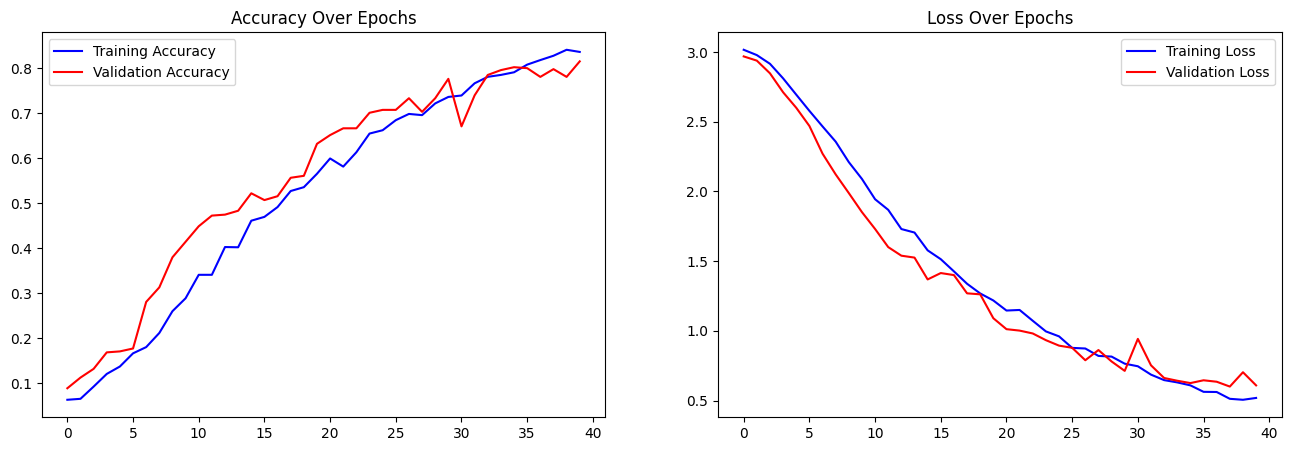

In [11]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    axes[0].plot(history.history['accuracy'], 'b-', label='Training Accuracy')
    axes[0].plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')
    axes[0].set_title('Accuracy Over Epochs')
    axes[0].legend()
    axes[1].plot(history.history['loss'], 'b-', label='Training Loss')
    axes[1].plot(history.history['val_loss'], 'r-', label='Validation Loss')
    axes[1].set_title('Loss Over Epochs')
    axes[1].legend()
    plt.show()

plot_training_history(history)


In [12]:
# Cell 1: Upload Test Video
from google.colab import files
uploaded = files.upload()

import os
# Rename uploaded file to standard test video path
for filename in uploaded.keys():
    if filename != "Project.mp4":
        os.rename(f"/content/{filename}", TEST_VIDEO_PATH)
    else:
        # If already named Project.mp4, ensure it's in the correct location
        if not os.path.exists(TEST_VIDEO_PATH):
            os.rename(f"/content/{filename}", TEST_VIDEO_PATH)


Saving Project.mp4 to Project.mp4


In [13]:
# Cell 2: Load Models
from tensorflow.keras.models import load_model
from ultralytics import YOLO

action_model = load_model(MODEL_SAVE_PATH)
yolo_model = YOLO('yolov8n.pt')  # Lightweight YOLOv8 nano model

print("✅ Action classification model loaded")
print("✅ YOLO object detection model loaded")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


✅ Action classification model loaded
✅ YOLO object detection model loaded


In [14]:
# Cell 3: Video Processing with Object Detection & Classification
import cv2
from collections import deque
import numpy as np
from tqdm import tqdm


def process_video_with_detection(video_path, action_model, yolo_model, config, output_path):
    """
    Process video with:
    - Person tracking and action recognition
    - Object detection for all items
    - Four-class output: Violence/Non-violence × With/Without object
    """

    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Create video writer (side-by-side: original | annotated)
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width * 2, height))

    # Tracking data structures
    frame_buffers = {}          # Store frame sequences per person
    person_positions = {}       # Last known position (cx, cy) per person
    person_id_counter = 0       # Unique person ID generator
    person_predictions = {}     # Cache predictions per person

    for frame_count in tqdm(range(total_frames), desc="Processing Video"):
        ret, frame = cap.read()
        if not ret:
            break

        annotated_frame = frame.copy()

        # ═══════════════════════════════════════════════════════
        # STEP 1: Detect all objects in the frame
        # ═══════════════════════════════════════════════════════
        results = yolo_model(frame, conf=config.YOLO_CONF_THRESHOLD, verbose=False)

        detected_objects = []  # Store all detected objects (class name, bbox)
        current_persons = []   # Track person IDs in this frame

        for result in results:
            boxes = result.boxes
            for box in boxes:
                cls_id = int(box.cls)
                cls_name = yolo_model.names[cls_id]
                x1, y1, x2, y2 = [int(coord) for coord in box.xyxy.cpu().numpy().flatten()]
                confidence = float(box.conf)

                # Store detected object info
                detected_objects.append({
                    'class_id': cls_id,
                    'class_name': cls_name,
                    'bbox': (x1, y1, x2, y2),
                    'confidence': confidence
                })

                # ═══════════════════════════════════════════════════════
                # STEP 2: Track and classify persons
                # ═══════════════════════════════════════════════════════
                if cls_id == config.PERSON_CLASS_ID:
                    cx, cy = (x1 + x2) // 2, (y1 + y2) // 2

                    # Match with existing tracked person or create new ID
                    person_id = None
                    min_dist = 100  # Maximum distance threshold for tracking

                    for pid, (prev_cx, prev_cy) in person_positions.items():
                        dist = np.sqrt((cx - prev_cx)**2 + (cy - prev_cy)**2)
                        if dist < min_dist:
                            person_id = pid
                            min_dist = dist

                    if person_id is None:
                        person_id_counter += 1
                        person_id = person_id_counter
                        frame_buffers[person_id] = deque(maxlen=config.SEQUENCE_LENGTH)
                        person_predictions[person_id] = {
                            'action': "Collecting...",
                            'confidence': 0.0,
                            'is_violent': False
                        }

                    person_positions[person_id] = (cx, cy)
                    current_persons.append(person_id)

                    # Crop and preprocess person region
                    person_crop = frame[y1:y2, x1:x2]
                    if person_crop.size == 0:
                        continue

                    crop_resized = cv2.resize(person_crop, (config.IMG_WIDTH, config.IMG_HEIGHT))
                    crop_rgb = cv2.cvtColor(crop_resized, cv2.COLOR_BGR2RGB)
                    crop_normalized = crop_rgb.astype(np.float32) / 255.0
                    frame_buffers[person_id].append(crop_normalized)

                    # ═══════════════════════════════════════════════════════
                    # STEP 3: Action classification
                    # ═══════════════════════════════════════════════════════
                    if len(frame_buffers[person_id]) == config.SEQUENCE_LENGTH:
                        sequence = np.expand_dims(np.array(frame_buffers[person_id]), axis=0)
                        predictions = action_model.predict(sequence, verbose=0)[0]
                        class_idx = np.argmax(predictions)
                        confidence_score = float(predictions[class_idx])
                        predicted_class = config.CLASS_NAMES[class_idx]
                        is_violent = class_idx in config.AGGRESSIVE_CLASSES

                        person_predictions[person_id] = {
                            'action': predicted_class,
                            'confidence': confidence_score,
                            'is_violent': is_violent
                        }

                    # Use cached prediction
                    pred_info = person_predictions[person_id]
                    predicted_class = pred_info['action']
                    confidence_score = pred_info['confidence']
                    is_violent = pred_info['is_violent']

                    # ═══════════════════════════════════════════════════════
                    # STEP 4: Check for dangerous objects near person
                    # ═══════════════════════════════════════════════════════
                    has_dangerous_object = False

                    # Check if any detected object is dangerous and overlaps with person
                    for obj in detected_objects:
                        obj_name = obj['class_name'].lower()
                        if any(danger_obj in obj_name for danger_obj in config.DANGEROUS_OBJECTS):
                            # Check if object bbox overlaps with person bbox
                            ox1, oy1, ox2, oy2 = obj['bbox']

                            # Simple overlap check (IoU-like)
                            if not (ox2 < x1 or ox1 > x2 or oy2 < y1 or oy1 > y2):
                                has_dangerous_object = True
                                break

                    # ═══════════════════════════════════════════════════════
                    # STEP 5: Determine final classification label
                    # ═══════════════════════════════════════════════════════
                    if is_violent and has_dangerous_object:
                        final_label = "Violence with object"
                        color = (0, 0, 255)  # Red
                    elif is_violent and not has_dangerous_object:
                        final_label = "Violence without object"
                        color = (0, 140, 255)  # Orange
                    elif not is_violent and has_dangerous_object:
                        final_label = "Non-violence with object"
                        color = (255, 255, 0)  # Cyan/Yellow
                    else:
                        final_label = "Non-violence without object"
                        color = (0, 255, 0)  # Green

                    # ═══════════════════════════════════════════════════════
                    # STEP 6: Draw bounding box and label on person
                    # ═══════════════════════════════════════════════════════
                    cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), color, 3)

                    label_text = f"P{person_id}: {final_label}"
                    sub_label = f"{predicted_class} ({confidence_score:.2f})"

                    # Draw main label
                    cv2.putText(annotated_frame, label_text, (x1, y1 - 25),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

                    # Draw sub-label (action details)
                    cv2.putText(annotated_frame, sub_label, (x1, y1 - 5),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # ═══════════════════════════════════════════════════════
        # STEP 7: Draw bounding boxes for all other objects
        # ═══════════════════════════════════════════════════════
        for obj in detected_objects:
            if obj['class_id'] != config.PERSON_CLASS_ID:  # Skip persons (already drawn)
                x1, y1, x2, y2 = obj['bbox']
                obj_name = obj['class_name']
                obj_conf = obj['confidence']

                # Highlight dangerous objects in red, others in blue
                is_dangerous = any(danger in obj_name.lower() for danger in config.DANGEROUS_OBJECTS)
                obj_color = (0, 0, 255) if is_dangerous else (255, 0, 0)  # Red for dangerous, Blue for others

                cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), obj_color, 2)
                cv2.putText(annotated_frame, f"{obj_name} ({obj_conf:.2f})", (x1, y1 - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.4, obj_color, 1)

        # Clean up tracking for persons no longer in frame
        person_positions = {pid: pos for pid, pos in person_positions.items() if pid in current_persons}

        # ═══════════════════════════════════════════════════════
        # STEP 8: Create side-by-side output
        # ═══════════════════════════════════════════════════════
        side_by_side = np.hstack([frame, annotated_frame])
        out.write(side_by_side)

    cap.release()
    out.release()
    print(f'✅ Output video saved at: {output_path}')


# Run the processing
process_video_with_detection(TEST_VIDEO_PATH, action_model, yolo_model, config, OUTPUT_VIDEO_PATH)


Processing Video: 100%|██████████| 3758/3758 [18:52<00:00,  3.32it/s]

✅ Output video saved at: /content/output_comparison.mp4


In [15]:
# Cell 4: Download the processed video
from google.colab import files
files.download(OUTPUT_VIDEO_PATH)
print("✅ Download started!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Download started!
